# **Project: Linear Classification with PyTorch**

### **Objective**:
To develop a simple linear classification neural network using PyTorch. This project will involve creating, training, and evaluating a model on the MNIST dataset, allowing students to understand the core components of building neural networks for classification tasks.

### **Prerequisites**:
- Basic understanding of Python programming
- Familiarity with matrix operations and probability
- Introduction to neural networks and the concept of classification

---

## **Table of Contents**:

1. [Setup and Imports](#1-setup-and-imports)
2. [Data Preparation](#2-data-preparation)
3. [Data Visualization](#3-data-visualization)
4. [Model Definition](#4-model-definition)
5. [Loss Function and Optimizer](#5-loss-function-and-optimizer)
6. [Training the Model](#6-training-the-model)
7. [Testing the Model](#7-testing-the-model)
8. [Model Prediction Visualization](#8-model-prediction-visualization)

---

### **1. Setup and Imports**

#### **Objective**:
Initialize the environment by importing essential libraries needed for building, training, and visualizing the neural network model.


In [3]:
# PyTorch for neural network and tensor operations
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Matplotlib for visualizing data and results
import matplotlib.pyplot as plt

### **2. Data Preparation**

#### **Objective**:

> To download and prepare the MNIST dataset for training and testing. We will normalize the images and convert them to tensors.

#### The MNIST Dataset

The **MNIST (Modified National Institute of Standards and Technology)** dataset is a large collection of handwritten digits commonly used for training and testing machine learning models, especially in computer vision. It includes **70,000 grayscale images** of handwritten digits (0 through 9), each **28x28 pixels** in size:

- **Training Set**: 60,000 images
- **Test Set**: 10,000 images

Each image in MNIST is labeled with the correct digit (0–9), making it an ideal dataset for tasks like classification and digit recognition.

#### Key Options in the `torchvision.datasets` Module for MNIST

The `torchvision.datasets` module provides an easy way to load and preprocess the MNIST dataset. Below are some important parameters when using `datasets.MNIST`:

- **`root`**: The directory where the dataset will be stored. If it doesn't exist, it will be created.
  
- **`train`**: If set to `True`, loads the training set (60,000 images). If `False`, loads the test set (10,000 images).

- **`download`**: If `True`, downloads the dataset to the specified `root` directory if it is not already available.

- **`transform`**: Accepts a transformation or series of transformations (like `ToTensor`) to apply to the images. For example, `transforms.ToTensor()` converts PIL images to PyTorch tensors and normalizes the pixel values to the range [0, 1].

#### Example Usage

The code below gives a simple example of the retrieval and displaying of the data items in the database MNIST using the torchvision.datasets module. 


Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0.00/9.91M [00:00<?, ?B/s]

  9%|▉         | 918k/9.91M [00:00<00:01, 7.77MB/s]

100%|██████████| 9.91M/9.91M [00:00<00:00, 49.2MB/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0.00/28.9k [00:00<?, ?B/s]

100%|██████████| 28.9k/28.9k [00:00<00:00, 1.96MB/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0.00/1.65M [00:00<?, ?B/s]

 78%|███████▊  | 1.28M/1.65M [00:00<00:00, 11.4MB/s]

100%|██████████| 1.65M/1.65M [00:00<00:00, 14.3MB/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0.00/4.54k [00:00<?, ?B/s]

100%|██████████| 4.54k/4.54k [00:00<00:00, 7.05MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



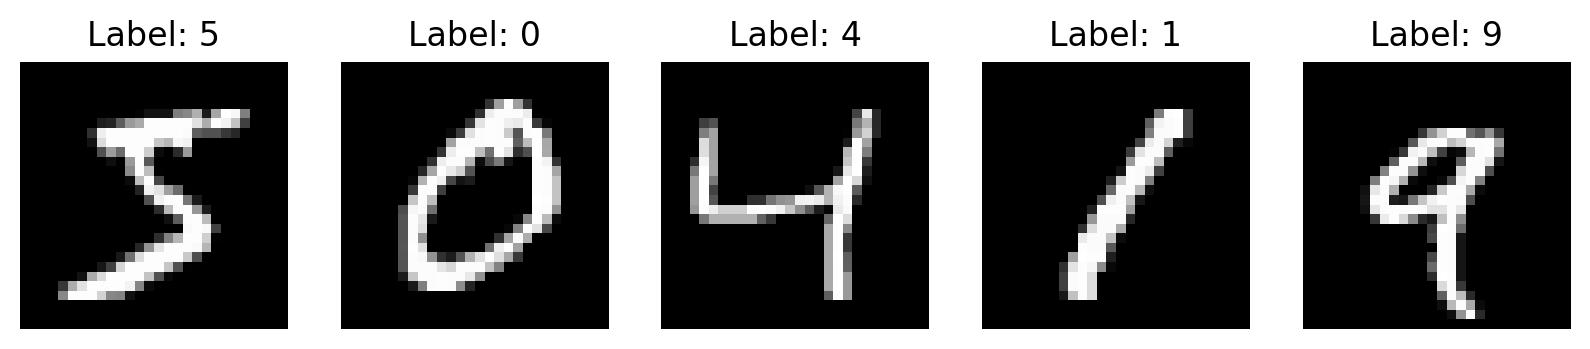

In [4]:
import matplotlib.pyplot as plt  # For plotting images
from torchvision import datasets  # For loading the MNIST dataset

# Download and load the MNIST dataset
# `root='./data'` specifies where to store the dataset
# `train=True` loads the training set (set to False for the test set)
# `download=True` ensures the dataset is downloaded if not already present
mnist_data = datasets.MNIST(root='./data', train=True, download=True)

# Function to display a specified number of images from the dataset
def show_images(dataset, num_images=5):
    # Create a figure with a row of subplots
    # `figsize=(10, 2)` controls the size of the entire figure
    fig, axes = plt.subplots(1, num_images, figsize=(10, 2))
    
    # Loop through the first `num_images` items in the dataset
    for i in range(num_images):
        # Retrieve the image and label for the current item
        image, label = dataset[i]
        
        # Display the image on the i-th subplot
        # `cmap="gray"` displays the image in grayscale
        axes[i].imshow(image, cmap="gray")
        
        # Set the title for the current subplot to show the label
        axes[i].set_title(f"Label: {label}")
        
        # Turn off axis markers for a cleaner look
        axes[i].axis("off")
    
    # Show the figure with all images
    plt.show()

# Call the function to display 5 items from the dataset
show_images(mnist_data, 5)

<div class="alert alert-block alert-info">
<b>NOTE</b> It is important to note that in the example above we did not implement any **transformation** to the `datasets.MNIST()` command.
</div>


**Activity Instructions**:

For our purpose we need to input the data from MNIST with three important modifications


Create a transform variable called `transform`  that does:
1. **Normalization**: Normalize the pixel values from [0, 255] to [-1, 1] to help the network train more effectively.
2.  **Transforms**  from images to tensors.

Once this variable `transform` is defined, use it as a parameter to the `datasets.MNIST`  call to create two variables: `train_dataset` and `test_dataset`.

2. **Batching**: Use the `train_dataset` and the `test_dataset` variables to create 2 instances of a `DataLoader `variable: `train_dataloader` and `test_dataloader`. When you define these datalaoder instances makes sure that you select a `batch_size` of 32. 

In [11]:
#Complete the code below

# Import necessary libraries for data visualization and manipulation
import matplotlib.pyplot as plt # For plotting and visualizing images
import numpy as np # For numerical operations, if needed
# Import PyTorch libraries for data handling and transformations
from torchvision import datasets, transforms  # For loading and transforming datasets
from torch.utils.data import DataLoader  # For creating data loaders to handle batches
#####################################################################
# Data preprocessing transformations: Declare the variable transform that:
# -Convert images to PyTorch tensors, 
# -Normalize to range [-1, 1]
#complete the line below
transform =  transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=(0.5,), std=(0.5,))])# Convert images to PyTorch tensors
              # Normalizes pixel values to mean 0.5 and std 0.5, scaling to range [-1, 1]

#####################################################################

#####################################################################
#Define the Dataset.MNIST variables train_dataset, testdataset with parameters
# - root='./data': Saves the dataset to a local 'data' directory
# - train=True: Loads the training set (60,000 images)
# - download=True: Downloads the dataset if it is not already in the specified directory
# - transform=transform: Applies the defined transformations to the dataset
# Download and load MNIST training and test datasets
#Complete the following two lines of code
train_dataset = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root="./data", train=False, download=True, transform=transform)
#####################################################################

#####################################################################
# DataLoader for batching and shuffling
batch_size = 64  # Number of images per batch

#Define two Dataloader variables: train_loader and test_loader
#Parameters of the DataLoader call for training:
# - batch_size=64: Defines the number of images in each batch
# - shuffle=True: Shuffles the training dataset for better learning (randomizes each epoch)
#Complete the line below
# the variable will take its data from the train_dataset variable defined above
train_loader = DataLoader(train_dataset, batch_size, shuffle=True)

#Parameters of the DataLoader call for testing:
# - batch_size=64: Defines the number of images in each batch
# - shuffle=false: Does not shuffle the test dataset to maintain consistency during evaluation
#Complete the line below
# the variable will take its data from the test_dataset variable defined above
test_loader = DataLoader(test_dataset, batch_size, shuffle=False)

### **3. Data Visualization**

#### **Objective**:
Visualize a few images from the dataset to gain familiarity with the input data format and content.

**Instructions**:
1. Extract the first batch of images and labels from the variable `train_dataloader`.
2. Store that batch into the tensor variables `images`, `labels`.
3. Print the shapes of the tensors `images` and `labels`.
4. Print the first vector in the tensor `images`.

The code defined at the end of the code below prints the first 6 elements of `images` and `labels` as images and numbers.

The output that you should get after you complete the code below and execute it correctly should be similar to:

![images1](images1.png)

shape of tensor images:  torch.Size([64, 1, 28, 28])
shape of tensor labels:  torch.Size([64])


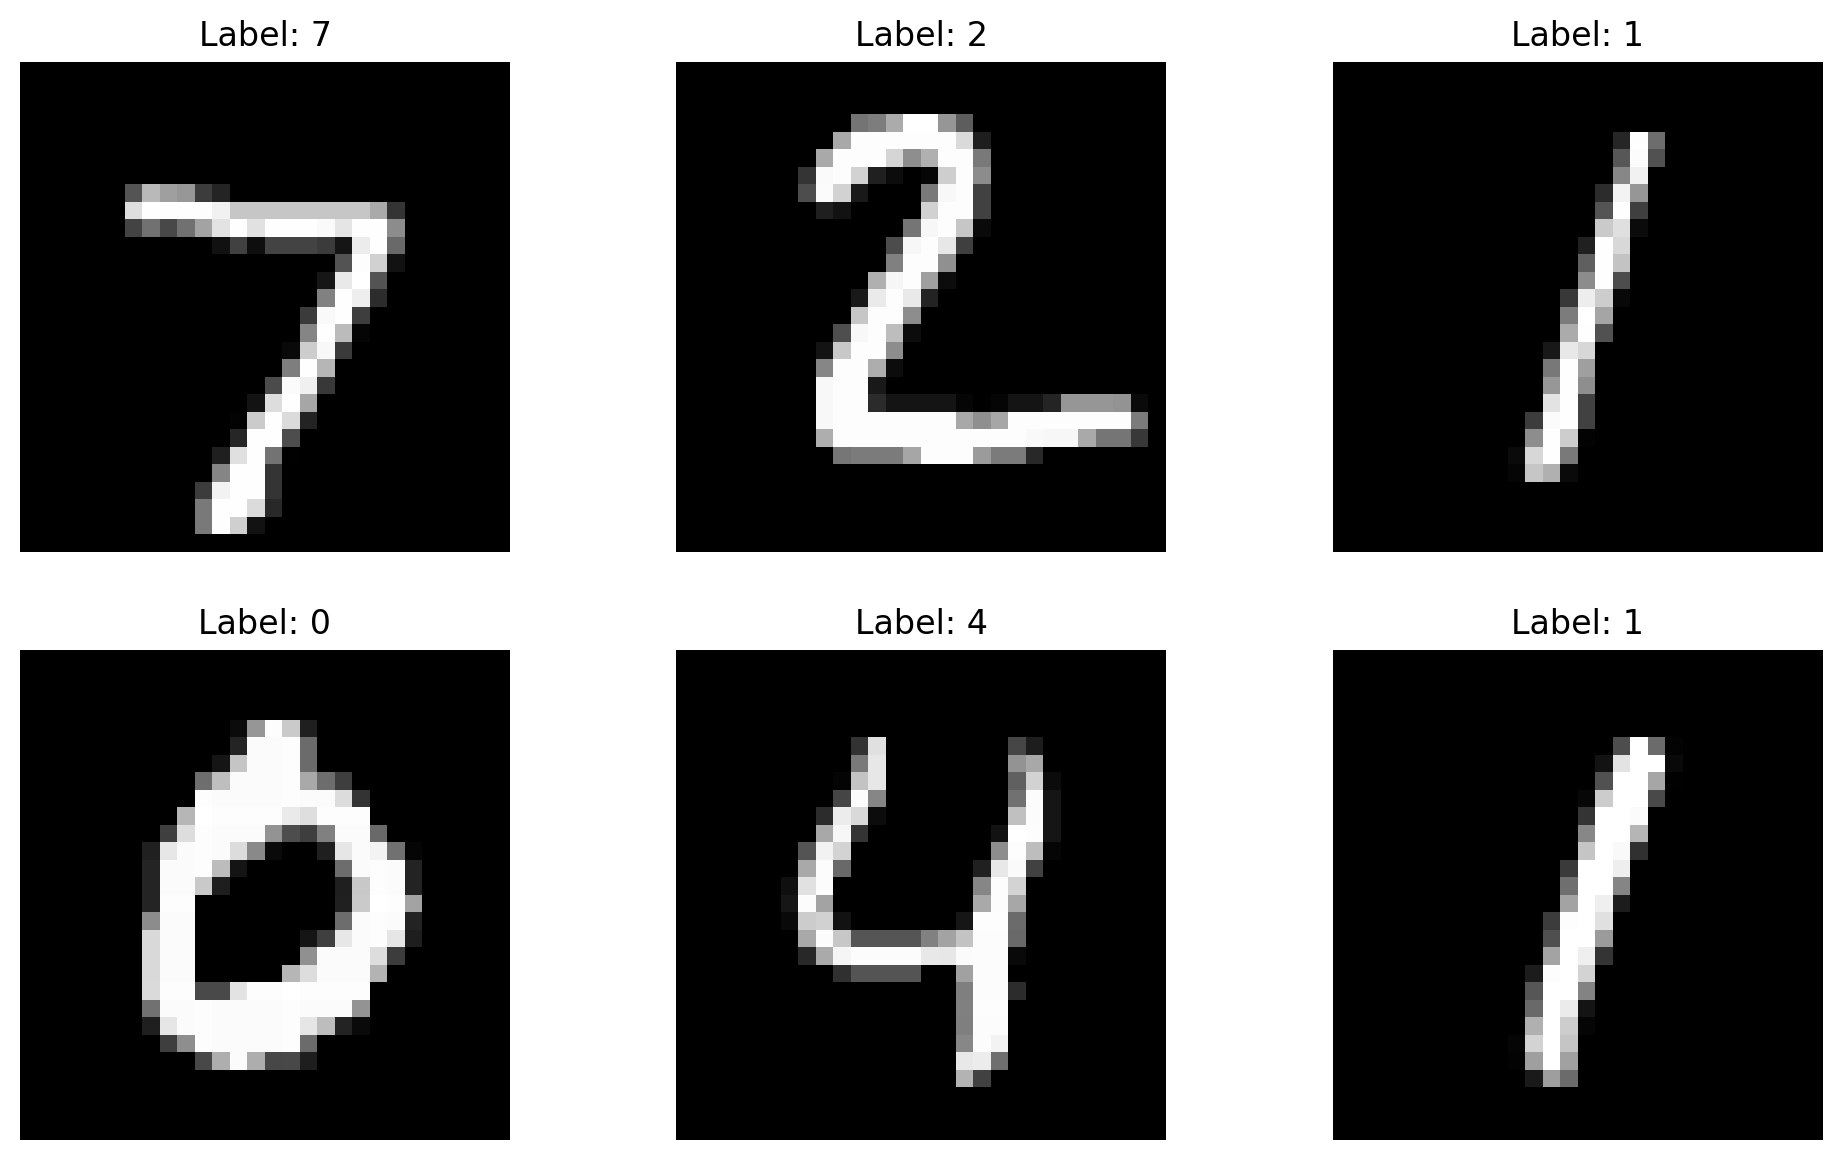

In [13]:
# Complete the code below

#####################################################################
# Retrieve the first batch of train_loader and store it as images and labels 
examples = next(iter(test_loader))   # Create an iterator for the training data called examples
images, labels = examples  # Get the first batch of images and labels
#print the shapeof the tensors `images` and `labels`.
print("shape of tensor images: ", images.shape)
print("shape of tensor labels: ", labels.shape)
#####################################################################

#####################################################################
# Display a few images from `images` with their `labels`
for i in range(6):
    plt.subplot(2, 3, i+1)  # Create a 2x3 grid of subplots
    plt.imshow(images[i][0], cmap='gray')  # Show the image (only 1 channel for grayscale)
    plt.title(f'Label: {labels[i].item()}')  # Display the label
    plt.axis('off')
plt.show()
#####################################################################

### **4. Model Definition**

#### **Objective**:
Define a linear classification model that maps input images to output classes.

#### `nn.Sequential` in PyTorch

The `nn.Sequential` class in PyTorch provides a simple way to build a neural network by stacking layers sequentially. 

It allows you to define a feed-forward model with a series of layers, such as fully connected layers, convolutional layers, or activation functions, in the order they should be executed. 

This approach is particularly useful for creating straightforward models that do not require complex, non-linear layer connections or branching.

#### Using `nn.Sequential` in Classification Tasks

In classification tasks, `nn.Sequential` is often used to define the sequence of operations that process input data through layers and activation functions, ultimately producing class probabilities. 

For example, a simple neural network can be built using `nn.Sequential` as follows:

```python
import torch
import torch.nn as nn

# Define a simple feed-forward neural network for classification
model = nn.Sequential(
    nn.Flatten(),           # Flatten the input (e.g., 28x28 image to 784 vector)
    nn.Linear(784, 128),    # Fully connected layer with 784 inputs and 128 outputs
    nn.ReLU(),              # ReLU activation function
    nn.Linear(128, 64),     # Fully connected layer with 128 inputs and 64 outputs
    nn.ReLU(),              # ReLU activation function
    nn.Linear(64, 10),      # Final layer with 64 inputs and 10 outputs (for 10 classes)
    nn.Softmax(dim=1)       # Softmax activation to output probabilities for each class
)
```

In this example:

* Layers are added sequentially, where each layer’s output feeds directly into the next layer.

* Activation Functions (e.g., ReLU and Softmax) are placed between layers to introduce non-linearities, enabling the model to learn complex patterns.

* The last layer typically outputs a vector representing class probabilities, allowing for straightforward prediction by taking the class with the highest probability.
nn.Sequential is particularly effective for standard classification tasks, making the model architecture both readable and concise.

**Activity Instructions**:

First,  define the variable `model` of type `nn.sequential`. This variable will contain a single layer with 10 output nodes.
For your variable `model`:

1. Flatten each 28x28 pixel image into a 784-dimensional vector.

2. Use a single linear layer to map the input vector to a 10-dimensional output (one for each digit class).

3. Initialize the weights and biases as follows: the weights to be randomly assigned form a distribution with mean $0$ and standard deviation $0.01$, and the bias to be assigned the initial value of $0$.

Your output should look like this:

![output3](Output3.png)

In [16]:
# Write your answer here

# Define the linear model
input_size = 28 * 28  # Each image is 28x28 pixels
num_classes = 10  # Digits 0-9
model = nn.Sequential(nn.Flatten(),   # Flatten each 28x28 image into a 784-dimensional vector
                      nn.Linear(input_size, num_classes)   # Single linear layer with 10 output nodes
                     )
# Initialize weights with a small Gaussian noise, biases as zero
model[1].weight.data = torch.normal(0, 0.01, size=(num_classes, input_size), requires_grad=True)

model[1].bias.data = torch.zeros(num_classes, requires_grad=True)

print("Model structure:\n", model)

Model structure:
 Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
)


### **5. Loss Function and Optimizer**

#### **Objective**:
Define the loss function and optimizer, which will help the model learn.

**Instructions**:
1. **Cross-Entropy Loss**: Use cross-entropy to measure the difference between predicted probabilities and actual labels, which is suitable for classification tasks. You may use the `nn.CrossEntropyLoss()` method from the class `nn`. Rename the `nn.CrossEntropyLoss()` as `criterion` so it is easier to write in what follows.

2. **Stochastic Gradient Descent (SGD)**: Set up the optimizer as a variable called `optimizer` to update weights to minimize the loss following the SGD method. USe the `optim.SGD` with the learning rate set at 0.01. 


In [17]:
#Complete the code below

# Cross-entropy loss function (common for classification tasks) renamed as criterion
criterion = nn.CrossEntropyLoss()

# Define the lr value and Stochastic Gradient Descent (SGD) optimizer
learning_rate = 0.01  # The step size for weight updates
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

### **6. Training the Model**

#### **Objective**:
Train the model over multiple epochs by feeding it batches of training data, calculating the loss, and updating the model parameters.

**Loop Steps**:
1. **Forward Pass**: Compute model predictions for each batch.
2. **Backward Pass**: Calculate the gradients of the loss with respect to model parameters.
3. **Optimizer Step**: Update model parameters using the calculated gradients.

Your output should be similar to:

![output](output.png)

Epoch [1/5], Loss: 567.9644, Accuracy: 85.04%


Epoch [2/5], Loss: 361.9403, Accuracy: 89.35%


Epoch [3/5], Loss: 329.9061, Accuracy: 90.17%


Epoch [4/5], Loss: 313.7467, Accuracy: 90.51%


Epoch [5/5], Loss: 303.5333, Accuracy: 90.74%


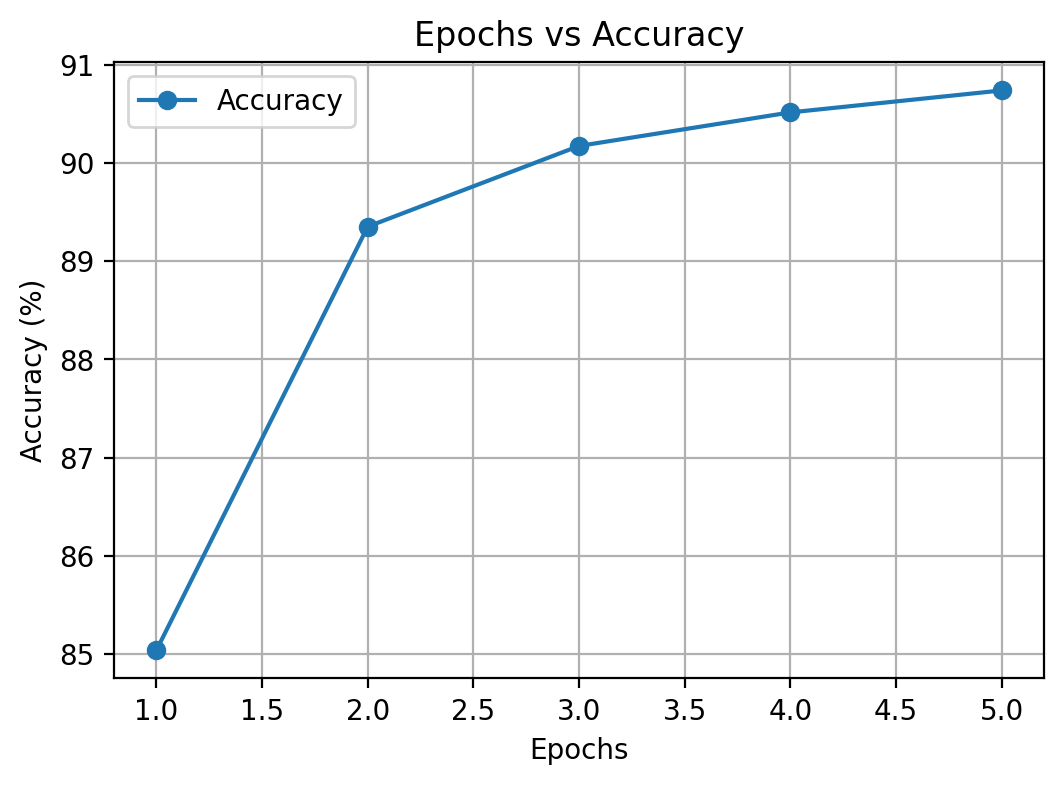

In [34]:
#Complete the code below
#####################################################################
#We initialize the required parameters
epochs = 5  # Number of times to iterate over the entire dataset (full training process)
accuracies = []  # List to store accuracy values for each epoch
learning_rate = 0.01  # The step size for weight updates
#####################################################################

#####################################################################
#We Reinitialize Model Parameters and we reset the Optimizer
#so that we can rerun this code with different parameters.

#Before starting a new training run, reinitialize the model's parameters to random values (as they were during the first initialization).
torch.nn.init.normal_(model[1].weight, mean=0.0, std=0.01)
torch.nn.init.constant_(model[1].bias, 0)

# Reset Optimizer: Recreate the optimizer with the new learning rate and ensure it uses the reinitialized model's parameters.
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
#####################################################################

#####################################################################
#We train now
for epoch in range(epochs):  # Loop over each epoch
    total_loss = 0  # Initialize the cumulative loss for the current epoch
    correct = 0  # Initialize the count of correctly predicted labels for the epoch
    total = 0  # Initialize the total number of labels processed in the epoch
    
    # Iterate over the data loader, which provides batches of images and their corresponding labels
    for images, labels in train_loader:
        # Flatten the 28x28 image tensors into 1D vectors of size 784
        # I dont see why this is necessary as the model flattens the input itself
        
        # Perform a forward pass through the model to get output predictions
        outputs = model(images)
        
        # Compute the loss using the defined criterion (e.g., CrossEntropyLoss)
        loss = criterion(outputs,labels)
        
        # Clear any previously accumulated gradients in the optimizer
        optimizer.zero_grad()
        
        # Perform backpropagation to compute gradients of the loss w.r.t. model parameters
        loss.backward()
        
        # Update the model parameters using the computed gradients
        optimizer.step()
        
        # Track training metrics
        total_loss += loss.item()  # Add the loss for this batch to the cumulative loss
        
        # Determine the predicted class with the highest probability
        _, predicted = outputs.max(1)  # `max(1)` returns the max value and its index for each sample along dim 1
        
        # Count the total number of labels in the batch
        total += labels.size(0)
        
        # Count how many predictions match the true labels
        correct += (predicted == labels).sum().item()

    # After all batches in the epoch, calculate accuracy
    accuracy = 100 * correct / total  # Convert accuracy to a percentage
    accuracies.append(accuracy)  # Store accuracy for plotting
    
    # Print the metrics for the current epoch
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {total_loss:.4f}, Accuracy: {accuracy:.2f}%')

#####################################################################
# Plot epochs vs accuracy
plt.figure(figsize=(6, 4))
plt.plot(range(1, epochs + 1), accuracies, marker='o', linestyle='-', label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Epochs vs Accuracy')
plt.grid(True)
plt.legend()
plt.show()
#####################################################################

### **7. Testing the Model**

#### **Objective**:
Evaluate the model's accuracy on unseen test data to assess generalization.

**Instructions**:
1. **Evaluation Mode**: Disable gradient computation and backpropagation by setting the model to evaluation mode.
2. Compute accuracy on the test dataset by comparing predictions with true label with the predictions obtained from your optimized neural network. The dataloader to use in this case is the `test_dataloader`, NOT the `train_dataloader`.

Your output should be similar to this:

![accuracy](accuracy.png)

In [35]:
# Write your code here
# Evaluation on the test set
# Switch the model to evaluation mode to ensure proper behavior during evaluation
# (e.g., disables dropout and batch normalization updates).
model.eval()

# Disable gradient computation since we are only evaluating the model and not updating weights.
# This reduces memory usage and speeds up the computation.
with torch.no_grad():  
    correct = 0  # Initialize the count of correct predictions
    total = 0  # Initialize the total number of samples in the test set

    # Loop through the test data loader, which provides batches of images and labels.
    for images, labels in test_loader:
        # Flatten each 28x28 image into a 1D vector of size 784 to match the input shape expected by the model.
        # I dont see why this is necessary as the model flattens the input itself
        
        # Perform a forward pass to obtain model predictions for the batch of images.
        outputs = model(images)
        
        # `outputs.max(1)` returns the maximum value and its index for each row in the batch (dim=1).
        # The index corresponds to the predicted class (e.g., 0-9 for digits in MNIST).
        _, predicted = outputs.max(1)
        
        # Count the number of labels in the current batch and add it to the total count.
        total += labels.size(0)
        
        # Compare the predicted labels to the true labels and count the number of correct predictions.
        correct += (predicted == labels).sum().item()
    
    # Calculate the overall accuracy as a percentage.
    # Accuracy = (Number of correct predictions / Total number of samples) * 100
    accuracy = 100 * correct / total
    
    # Print the test accuracy in percentage format.
    print(f'Test Accuracy: {accuracy:.2f}%')

Test Accuracy: 91.36%


### **8. Model Prediction Visualization**

#### **Objective**:

Visualize a few predictions to understand the model’s performance visually.

**Instructions**:

1. Display sample images with predicted and actual labels to see the model’s accuracy on specific cases. 

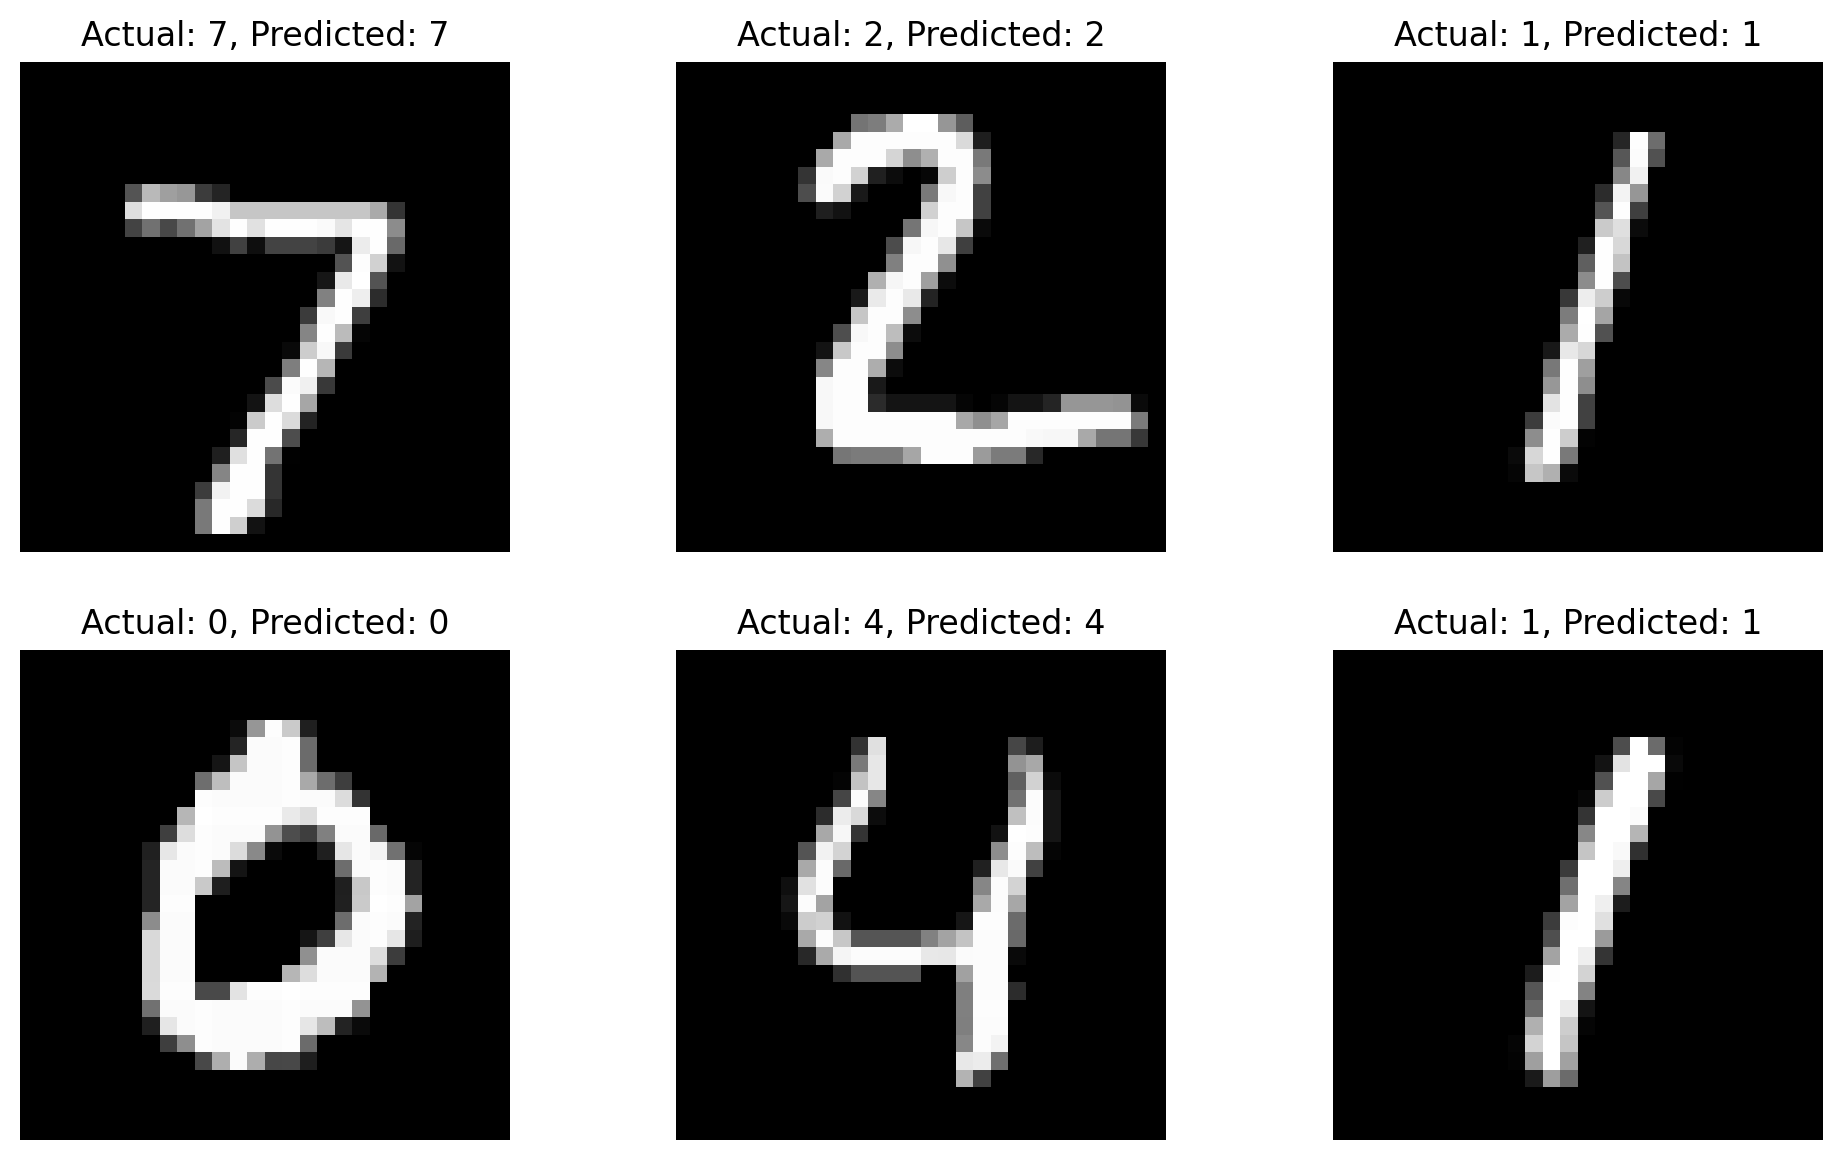

In [44]:
# Write your code here

# Display predictions for a few images
examples = next(iter(test_loader))          # Create an iterator for the test data
images, labels = examples                   # Get the first batch of images and labels
outputs = model(images)                     # Forward pass for predictions
predictions = torch.argmax(outputs, dim=1)  # Get index of max probability for each image

# Display a few images with their predictions and true labels
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i][0], cmap='gray')  # Show the image
    plt.title(f'Actual: {labels[i].item()}, Predicted: {predictions[i].item()}')
    plt.axis('off')
plt.show()

### Summary

This notebook walks through the process of building, training, and testing a simple linear classification model on the MNIST dataset using PyTorch.

By completing these exercises, students will gain hands-on experience with the fundamental steps in building a classification neural network, including data preparation, model definition, training, and evaluation.

**END OF WORKSHEET**

Make sure that you answered all the questions on time. This completed `Jupyter Notebook` will be collected and graded. 

Once the `Jupyter Notebook` is collected it can not be modified.